<a href="https://colab.research.google.com/github/fornieligulo/Algiritma_NBC/blob/main/NBC_3_1_%7C_SKRIPSI_ANALISIS_SENTIMENT_TWEET_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('Hasil Labelling Tweet Indonesia.csv')
df.head()

,username,date,Tweet,Compound_Score,Sentiments
0,terkinidotid,2023-01-10 13:07:33,acara anak sambo kuat ferdy sambo anak lontar ...,0.0000,Netral
1,TribunLombokcom,2023-01-12 09:56:06,adik brigadir jreza putri candrawathi tukar pe...,0.0000,Netral
2,Metro_TV,2023-01-13 15:01:21,adil negeri jakarta selatan gelar periksa dakw...,0.5267,Positif
3,ForumTerkini,2023-01-09 04:52:18,adil negeri jakarta selatan gelar sidang lanju...,0.0000,Netral
4,newsmerahputih,2023-01-12 13:05:00,ahli ite saksi sidang bunuh brigadir j merahpu...,0.0000,Netral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        236 non-null    object 
 1   date            236 non-null    object 
 2   Tweet           236 non-null    object 
 3   Compound_Score  236 non-null    float64
 4   Sentiments      236 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Compound_Score,236.0,-0.011168,0.159801,-0.8934,0.0,0.0,0.0,0.5719


In [ ]:
df['Sentiments'].value_counts()

Netral     207
Negatif     17
Positif     12
Name: Sentiments, dtype: int64

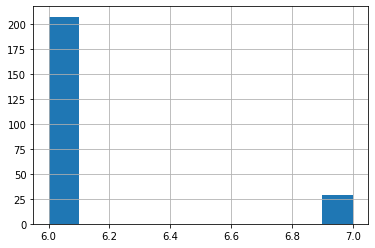

In [ ]:
df['Sentiments'].str.len().hist() 

Text(0.5, 1.0, 'Positif Reviews')

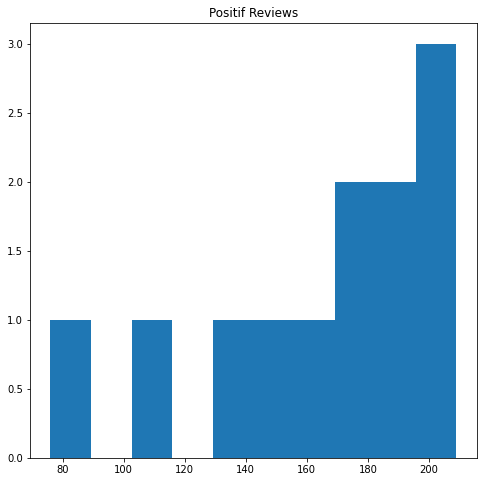

In [ ]:
fig,(ax1)=plt.subplots(figsize=(8,8))

ax1.hist(df[df['Sentiments']=='Positif']['Tweet'].str.len())
ax1.set_title( 'Positif Reviews')

Text(0.5, 1.0, 'Negatif Reviews')

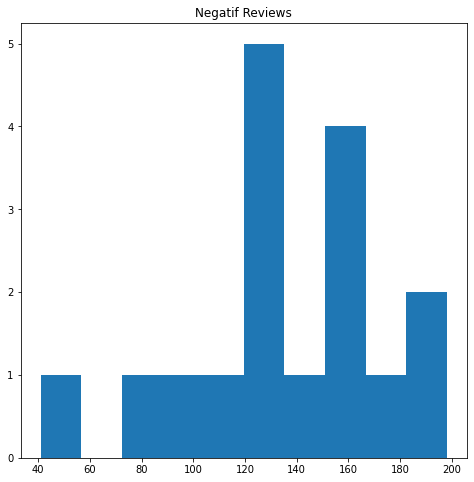

In [ ]:
fig,(ax2)=plt.subplots(figsize=(8,8))

ax2.hist(df[df['Sentiments']=='Negatif']['Tweet'].str.len())
ax2.set_title( 'Negatif Reviews')


Text(0.5, 1.0, 'Netral Reviews')

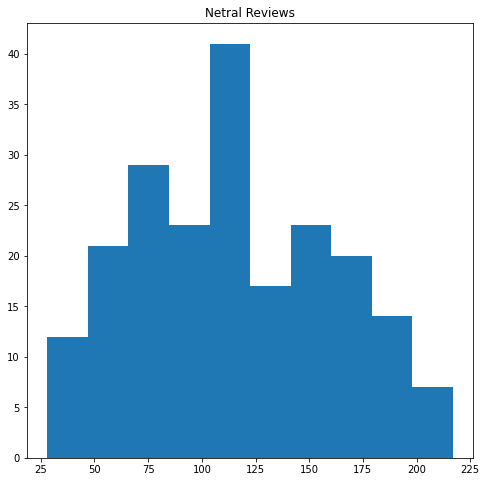

In [ ]:
fig,(ax3)=plt.subplots(figsize=(8,8))

ax3.hist(df[df['Sentiments']=='Netral']['Tweet'].str.len())
ax3.set_title( 'Netral Reviews')

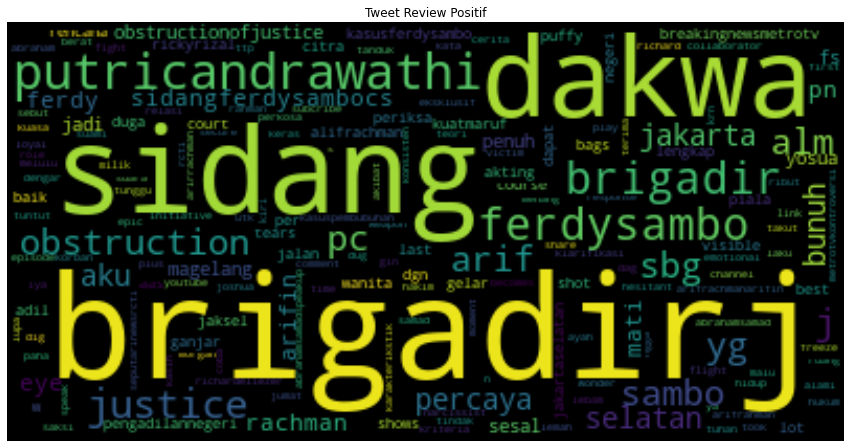

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Positif']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Positif')
plt.show()

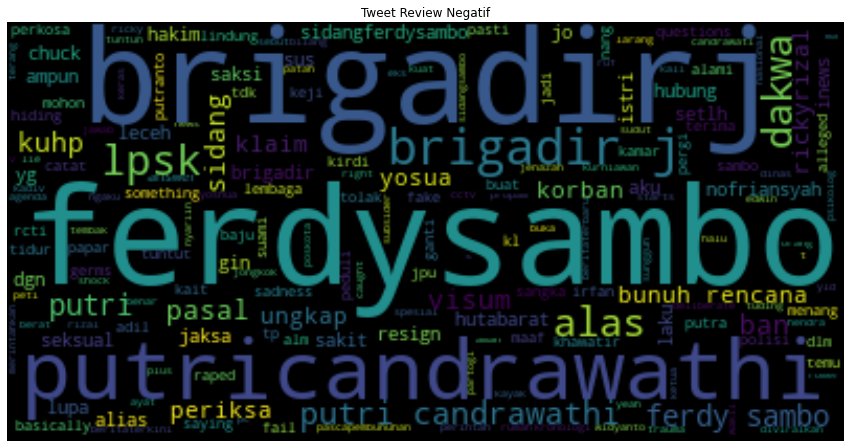

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Negatif']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Negatif')
plt.show()

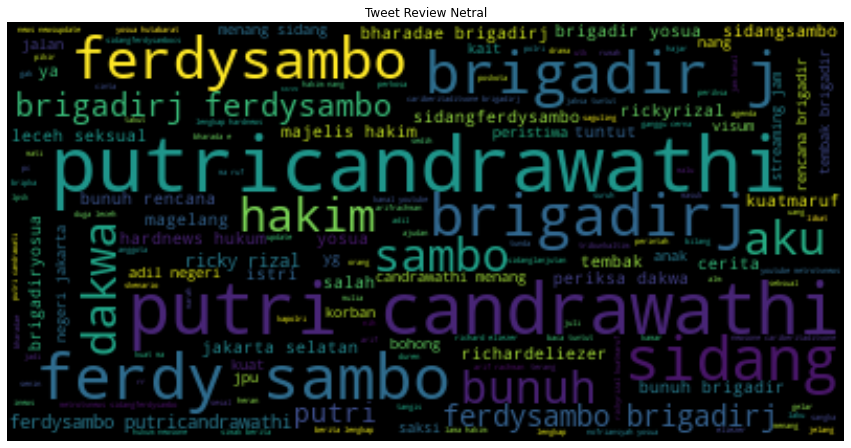

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Netral']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Netral')
plt.show()

In [ ]:
df.rename(columns={'Tweet':'text'}, inplace = True)
df

,username,date,text,Compound_Score,Sentiments
0,terkinidotid,2023-01-10 13:07:33,acara anak sambo kuat ferdy sambo anak lontar ...,0.0000,Netral
1,TribunLombokcom,2023-01-12 09:56:06,adik brigadir jreza putri candrawathi tukar pe...,0.0000,Netral
2,Metro_TV,2023-01-13 15:01:21,adil negeri jakarta selatan gelar periksa dakw...,0.5267,Positif
3,ForumTerkini,2023-01-09 04:52:18,adil negeri jakarta selatan gelar sidang lanju...,0.0000,Netral
4,newsmerahputih,2023-01-12 13:05:00,ahli ite saksi sidang bunuh brigadir j merahpu...,0.0000,Netral
...,...,...,...,...,...
231,kompascom,2023-01-13 12:21:53,wakil ketua lpsk edwin partogi ban terang dakw...,-0.5574,Negatif
232,magalitorre02,2023-01-10 00:03:37,ya inti ngga seorg penghianat kuat ma ruf brig...,0.0000,Netral
233,magalitorre02,2023-01-14 06:11:49,ya kasihan si arif ferdisambo hukum berat,0.0000,Netral
234,magalitorre02,2023-01-10 18:21:05,yaelah se-indonesia bodoh ferdysambo sidangfer...,0.0000,Netral


In [ ]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['text'].apply(cleaning)

In [ ]:
df['Sentiments']

0       Netral
1       Netral
2      Positif
3       Netral
4       Netral
        ...   
231    Negatif
232     Netral
233     Netral
234     Netral
235     Netral
Name: Sentiments, Length: 236, dtype: object

In [ ]:
dt = pd.DataFrame(dt)  
dt['Sentiments']=df['Sentiments']
dt

,text,Sentiments
0,acara anak sambo kuat ferdy sambo anak lontar ...,Netral
1,adik brigadir jreza putri candrawathi tukar pe...,Netral
2,adil negeri jakarta selatan gelar periksa dakw...,Positif
3,adil negeri jakarta selatan gelar sidang lanju...,Netral
4,ahli ite saksi sidang bunuh brigadir j merahpu...,Netral
...,...,...
231,wakil ketua lpsk edwin partogi ban terang dakw...,Negatif
232,ya inti ngga seorg penghianat kuat ma ruf brig...,Netral
233,ya kasihan si arif ferdisambo hukum berat,Netral
234,yaelah seindonesia bodoh ferdysambo sidangferd...,Netral


In [ ]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dt

,text,Sentiments,no_sw
0,acara anak sambo kuat ferdy sambo anak lontar ...,Netral,acara anak sambo kuat ferdy sambo anak lontar ...
1,adik brigadir jreza putri candrawathi tukar pe...,Netral,adik brigadir jreza putri candrawathi tukar pe...
2,adil negeri jakarta selatan gelar periksa dakw...,Positif,adil negeri jakarta selatan gelar periksa dakw...
3,adil negeri jakarta selatan gelar sidang lanju...,Netral,adil negeri jakarta selatan gelar sidang dakwa...
4,ahli ite saksi sidang bunuh brigadir j merahpu...,Netral,ahli ite saksi sidang bunuh brigadir merahputi...
...,...,...,...
231,wakil ketua lpsk edwin partogi ban terang dakw...,Negatif,wakil ketua lpsk edwin partogi ban terang dakw...
232,ya inti ngga seorg penghianat kuat ma ruf brig...,Netral,inti ngga seorg penghianat kuat ruf brigadirj ...
233,ya kasihan si arif ferdisambo hukum berat,Netral,kasihan arif ferdisambo hukum berat
234,yaelah seindonesia bodoh ferdysambo sidangferd...,Netral,yaelah seindonesia bodoh ferdysambo sidangferd...


In [ ]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,brigadirj,138
1,ferdysambo,131
2,putricandrawathi,123
3,putri,111
4,sambo,94
5,brigadir,87
6,candrawathi,80
7,sidang,78
8,ferdy,66
9,hakim,54


In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', width=700, height=700)

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,Sentiments,no_sw,wo_stopfreq
0,acara anak sambo kuat ferdy sambo anak lontar ...,Netral,acara anak sambo kuat ferdy sambo anak lontar ...,acara anak kuat anak lontar acara rasamala
1,adik brigadir jreza putri candrawathi tukar pe...,Netral,adik brigadir jreza putri candrawathi tukar pe...,adik jreza tukar pesan chat suruh rumah brigad...
2,adil negeri jakarta selatan gelar periksa dakw...,Positif,adil negeri jakarta selatan gelar periksa dakw...,adil negeri jakarta selatan gelar periksa dakw...
3,adil negeri jakarta selatan gelar sidang lanju...,Netral,adil negeri jakarta selatan gelar sidang dakwa...,adil negeri jakarta selatan gelar dakwa bunuh ...
4,ahli ite saksi sidang bunuh brigadir j merahpu...,Netral,ahli ite saksi sidang bunuh brigadir merahputi...,ahli ite saksi bunuh merahputihcom kasuspembun...


In [ ]:
dt['no_sw'].loc[4]

'ahli ite saksi sidang bunuh brigadir merahputihcom ferdysambo brigadirj kasuspembunuhan putricandrawathi'

In [ ]:
dt['wo_stopfreq'].loc[4]

'ahli ite saksi bunuh merahputihcom kasuspembunuhan'

In [ ]:
dt

,text,Sentiments,no_sw,wo_stopfreq
0,acara anak sambo kuat ferdy sambo anak lontar ...,Netral,acara anak sambo kuat ferdy sambo anak lontar ...,acara anak kuat anak lontar acara rasamala
1,adik brigadir jreza putri candrawathi tukar pe...,Netral,adik brigadir jreza putri candrawathi tukar pe...,adik jreza tukar pesan chat suruh rumah brigad...
2,adil negeri jakarta selatan gelar periksa dakw...,Positif,adil negeri jakarta selatan gelar periksa dakw...,adil negeri jakarta selatan gelar periksa dakw...
3,adil negeri jakarta selatan gelar sidang lanju...,Netral,adil negeri jakarta selatan gelar sidang dakwa...,adil negeri jakarta selatan gelar dakwa bunuh ...
4,ahli ite saksi sidang bunuh brigadir j merahpu...,Netral,ahli ite saksi sidang bunuh brigadir merahputi...,ahli ite saksi bunuh merahputihcom kasuspembun...
...,...,...,...,...
231,wakil ketua lpsk edwin partogi ban terang dakw...,Negatif,wakil ketua lpsk edwin partogi ban terang dakw...,wakil ketua lpsk edwin partogi ban terang dakw...
232,ya inti ngga seorg penghianat kuat ma ruf brig...,Netral,inti ngga seorg penghianat kuat ruf brigadirj ...,inti ngga seorg penghianat kuat ruf
233,ya kasihan si arif ferdisambo hukum berat,Netral,kasihan arif ferdisambo hukum berat,kasihan arif ferdisambo hukum berat
234,yaelah seindonesia bodoh ferdysambo sidangferd...,Netral,yaelah seindonesia bodoh ferdysambo sidangferd...,yaelah seindonesia bodoh sidangferdysambo


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Sentiments,no_sw,wo_stopfreq,wo_stopfreq_lem
0,acara anak sambo kuat ferdy sambo anak lontar ...,Netral,acara anak sambo kuat ferdy sambo anak lontar ...,acara anak kuat anak lontar acara rasamala,acara anak kuat anak lontar acara rasamala
1,adik brigadir jreza putri candrawathi tukar pe...,Netral,adik brigadir jreza putri candrawathi tukar pe...,adik jreza tukar pesan chat suruh rumah brigad...,adik jreza tukar pesan chat suruh rumah brigad...
2,adil negeri jakarta selatan gelar periksa dakw...,Positif,adil negeri jakarta selatan gelar periksa dakw...,adil negeri jakarta selatan gelar periksa dakw...,adil negeri jakarta selatan gelar periksa dakw...
3,adil negeri jakarta selatan gelar sidang lanju...,Netral,adil negeri jakarta selatan gelar sidang dakwa...,adil negeri jakarta selatan gelar dakwa bunuh ...,adil negeri jakarta selatan gelar dakwa bunuh ...
4,ahli ite saksi sidang bunuh brigadir j merahpu...,Netral,ahli ite saksi sidang bunuh brigadir merahputi...,ahli ite saksi bunuh merahputihcom kasuspembun...,ahli ite saksi bunuh merahputihcom kasuspembun...
...,...,...,...,...,...
231,wakil ketua lpsk edwin partogi ban terang dakw...,Negatif,wakil ketua lpsk edwin partogi ban terang dakw...,wakil ketua lpsk edwin partogi ban terang dakw...,wakil ketua lpsk edwin partogi ban terang dakw...
232,ya inti ngga seorg penghianat kuat ma ruf brig...,Netral,inti ngga seorg penghianat kuat ruf brigadirj ...,inti ngga seorg penghianat kuat ruf,inti ngga seorg penghianat kuat ruf
233,ya kasihan si arif ferdisambo hukum berat,Netral,kasihan arif ferdisambo hukum berat,kasihan arif ferdisambo hukum berat,kasihan arif ferdisambo hukum berat
234,yaelah seindonesia bodoh ferdysambo sidangferd...,Netral,yaelah seindonesia bodoh ferdysambo sidangferd...,yaelah seindonesia bodoh sidangferdysambo,yaelah seindonesia bodoh sidangferdysambo


In [ ]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])

nb.columns=['Sentiments','Tweet']
nb.Sentiments = [1 if each == "Positif" else -1 if each == "Negatif" else 0 for each in nb.Sentiments]
nb


,Sentiments,Tweet
0,0,acara anak kuat anak lontar acara rasamala
1,0,adik jreza tukar pesan chat suruh rumah brigad...
2,1,adil negeri jakarta selatan gelar periksa dakw...
3,0,adil negeri jakarta selatan gelar dakwa bunuh ...
4,0,ahli ite saksi bunuh merahputihcom kasuspembun...
...,...,...
231,-1,wakil ketua lpsk edwin partogi ban terang dakw...
232,0,inti ngga seorg penghianat kuat ruf
233,0,kasihan arif ferdisambo hukum berat
234,0,yaelah seindonesia bodoh sidangferdysambo


In [ ]:
tokenized_review=nb['Tweet'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [acara, anak, kuat, anak, lontar, acara, rasam...
1    [adik, jreza, tukar, pesan, chat, suruh, rumah...
2    [adil, negeri, jakarta, selatan, gelar, periks...
3    [adil, negeri, jakarta, selatan, gelar, dakwa,...
4    [ahli, ite, saksi, bunuh, merahputihcom, kasus...
Name: Tweet, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['Tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['Sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 70.83%
------------------------------------------------
Confusion Matrix:
   0   1  2
0  1   2  1
1  1  32  9
2  1   0  1
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.33      0.25      0.29         4
           0       0.94      0.76      0.84        42
           1       0.09      0.50      0.15         2

    accuracy                           0.71        48
   macro avg       0.46      0.50      0.43        48
weighted avg       0.86      0.71      0.77        48



In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 72.92%
------------------------------------------------
Confusion Matrix:
   0   1  2
0  1   2  1
1  3  34  5
2  1   1  0
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.20      0.25      0.22         4
           0       0.92      0.81      0.86        42
           1       0.00      0.00      0.00         2

    accuracy                           0.73        48
   macro avg       0.37      0.35      0.36        48
weighted avg       0.82      0.73      0.77        48



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 87.50%
------------------------------------------------
Confusion Matrix:
   0   1  2
0  0   4  0
1  0  42  0
2  0   2  0
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.88      1.00      0.93        42
           1       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.29      0.33      0.31        48
weighted avg       0.77      0.88      0.82        48



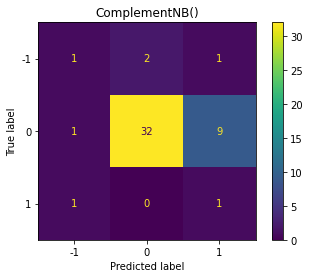

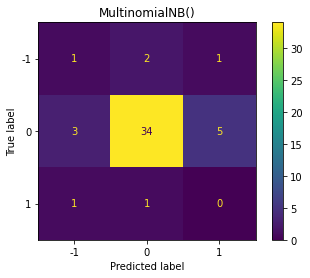

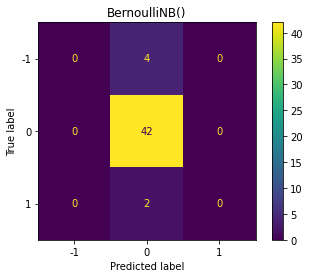

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['Tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['Sentiments'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 60.42%


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['Tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['Sentiments'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 56.25%


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['Tweet'])

In [ ]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['Sentiments'],test_size=0.20,random_state=30)

In [ ]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 87.50%


In [ ]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 87.50%


In [ ]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 66.67%
